In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# PCA

In [106]:
data=pd.read_csv("Final_Dataset.csv").iloc[:,2:]
print(data)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print(standardized_data)

      Electricity_price  Exchange  CO2_spot  EU_spark_spread  \
0             35.026250   1.30505     7.640       -28.153070   
1             32.163333   1.29415     6.310       -23.301759   
2             20.350000   1.27805     6.310       -30.738948   
3             36.257083   1.27205     6.310       -12.521667   
4             32.575833   1.27205     6.310       -17.495406   
...                 ...       ...       ...              ...   
4223          93.911250   1.09750    89.360        31.057596   
4224          95.919167   1.10160    88.345        37.584137   
4225          76.675417   1.10160    87.330        23.388219   
4226          31.754583   1.10160    87.330       -21.532614   
4227          70.969167   1.09950    87.330        17.661615   

      EU_clean_spark_spread  Oil_Price  Oil_Volume  Sun_energy  Wind_energy  \
0                -31.514670     112.13      178618       12619    711315.00   
1                -26.078159     113.70      221268        8413    834163.

In [6]:
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

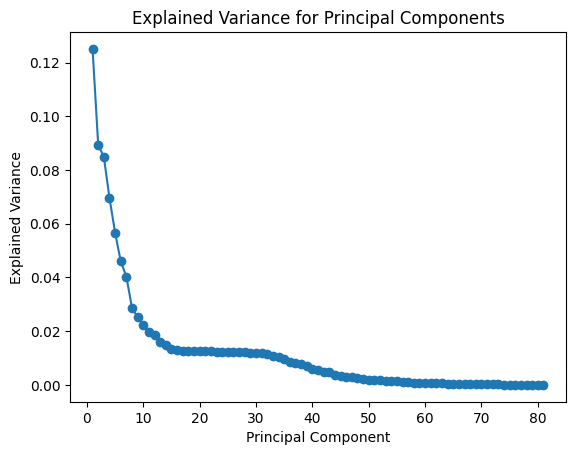

In [7]:
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Principal Components')
plt.show()

In [8]:
n_components = 20  # Example: Choose the number of components you want to retain
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(standardized_data)

In [9]:
print(reduced_data)

[[ 1.57290653 -1.52721442  4.00985797 ...  0.06812473  0.10369888
   1.00634211]
 [ 1.89780656 -1.99255408  4.63526565 ...  0.45658433 -0.21362092
  -0.21612126]
 [ 2.21511622 -2.5740382   5.46108458 ...  0.2713523  -0.14172643
  -0.2201596 ]
 ...
 [-3.52866634  3.13925271  1.35067792 ... -0.13542088  0.03759555
  -0.37718247]
 [-4.01833158  1.94704918  3.6401021  ... -0.50017435  0.10919445
  -0.07273131]
 [-2.68206545  2.49920077  3.26258568 ... -0.42698459  0.24150388
  -0.07409342]]


# XGBoost

In [16]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import numpy as np

In [114]:
data=pd.read_csv("Final_Dataset.csv").iloc[:,1:-1]
print(data["Target"])
data['Is_default'] = np.where((data['Target'] == 0.000000), 1, 0)
data["Target"]=data["Target"].shift(-1)
data=data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month.astype(int)
data['day_of_week'] = data['Date'].dt.dayofweek.astype(int)
data['Year'] = data['Date'].dt.year.astype(int)
data['Quarter'] = data['Date'].dt.quarter.astype(int)

X = data.iloc[:,1:].drop('Target', axis=1)
y = data['Target']
print(X)
print(y)

model = xgb.XGBRegressor(epochs=100,n_estimators=100,learning_rate=0.01)
model.fit(X, y)

0       0.140366
1      -0.130223
2      -0.082186
3      -0.046273
4       0.026152
          ...   
4223   -0.043099
4224   -0.074606
4225   -0.090507
4226    0.000000
4227    0.000382
Name: Target, Length: 4228, dtype: float64
      Electricity_price  Exchange  CO2_spot  EU_spark_spread  \
0             35.026250   1.30505     7.640       -28.153070   
1             32.163333   1.29415     6.310       -23.301759   
2             20.350000   1.27805     6.310       -30.738948   
3             36.257083   1.27205     6.310       -12.521667   
4             32.575833   1.27205     6.310       -17.495406   
...                 ...       ...       ...              ...   
4222          95.244583   1.10850    89.360        29.622764   
4223          93.911250   1.09750    89.360        31.057596   
4224          95.919167   1.10160    88.345        37.584137   
4225          76.675417   1.10160    87.330        23.388219   
4226          31.754583   1.10160    87.330       -21.532614   

 

C:\Users\Olej0\OneDrive\Dokumenter\TFT_Model\pytorch-forecasting\myenv\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Olej0\OneDrive\Dokumenter\TFT_Model\pytorch-forecasting\myenv\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Olej0\OneDrive\Dokumenter\TFT_Model\pytorch-forecasting\myenv\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Olej0\OneDrive\Dokumenter\TFT_Model\pytorch-forecasting\myenv\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categori

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, epochs=100, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

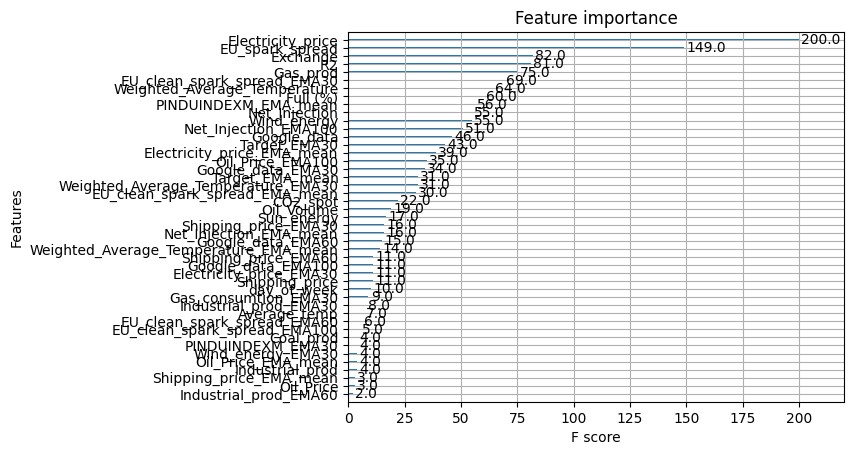

In [78]:
plot_importance(model)
plt.show()

In [115]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.01]

column_list=feature_importance_df["Feature"].values
print(len(column_list))

                         Feature  Importance
29        Net_Injection_EMA_mean    0.053328
20  EU_clean_spark_spread_EMA100    0.045659
26           Net_Injection_EMA30    0.045472
41    Electricity_price_EMA_mean    0.044111
68                        Oil_R2    0.039203
..                           ...         ...
51             Google_data_EMA60    0.000000
49      Industrial_prod_EMA_mean    0.000000
48        Industrial_prod_EMA100    0.000000
47         Industrial_prod_EMA60    0.000000
84                       Quarter    0.000000

[85 rows x 2 columns]
36


In [37]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 0.1  # Regularization parameter (adjust as needed)
l1_ratio = 0.3 # Mixing parameter (0.0 for L2, 1.0 for L1)

model_E = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
model_E.fit(X_train, y_train)
y_pred = model_E.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.001737226857532705


In [ ]:
# Access the coefficients assigned to each feature
coefficients = model_E.coef_

# Create a boolean mask to identify selected features
selected_features = coefficients != 0

# Get the names of the selected features
feature_names = X.columns  # Assuming X is your feature DataFrame

# Extract the names of selected features
selected_feature_names = feature_names[selected_features]

print("Selected Features:")
for i in range(len(selected_feature_names)):
    column=selected_feature_names[i]
    if column not in column_list:
        column_list = np.append(column_list, column)
        
a=pd.DataFrame()
a["Features"]=column_list
        
print(a)
a.to_csv("Features.csv")